In [2]:
import numpy as np
import sys
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from keras.datasets import fashion_mnist
from sklearn.preprocessing import normalize
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
# Loading the dataset

(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(-1,testX.shape[1]*testX.shape[2])
X = normalize(X, axis=0, norm='max')

4431872/4422102 [==============================] - 4s 1us/step


In [4]:
# implement Kmeans from scratch

class Kmeans:

  def __init__(self, k, iterations=100):
    self.k=k
    self.iter=iterations
    self.centers=[]

  def get_distance(self, x, y, method="euclidean"):
    if method == "euclidean":
      return np.linalg.norm(x-y)
    elif method == "manhattan":
      return np.abs(x-y).sum()
    elif method == "minkowski":
         return (p_root(sum(pow(abs(a-b), 3) for a, b in zip(x, y)), 3))

  def intialize_centroids(self, data, method="kmeans-plus"):
    if method == "kmeans-plus":
      num = len(data)
      # initialise with random centers
      rand=np.random.randint(0, num)
      centers = []
      centers.append(data[rand])
      for _ in range(self.k-1):
        dist = []
        for i in range(num):
          mx = sys.maxsize
          for j in range(len(centers)):
            mx = min(mx, self.get_distance(data[i], centers[j], "euclidean"))
          dist.append(mx)
        centers.append(data[np.argmax(dist,axis=0)])
      return centers

    elif method == "forgy":
      return data[np.random.choice(range(data.shape[0]), replace = False, size = self.k), :]

    elif method == "random-partition":
      mean = []
      indices = np.random.choice(range(0, self.k), replace = True, size = data.shape[0])
      for count in range(self.k):
          mean.append(data[indices == count].mean(axis=0))
      return np.concatenate([val[ None, :] for val in mean], axis = 0)

  

  def fit(self, data, method="euclidean", typ="kmeans-plus"):
     centers = self.intialize_centroids(data, typ)
     self.labels = np.zeros(0)
     for i in range(self.iter):
       lbls = np.zeros(len(data))
       for j in range(len(data)):
         dist_from_centers=np.zeros(self.k)
         for cids in range(self.k):
           dist_from_centers[cids]+=self.get_distance(data[j], centers[cids])
         lbls[j] += np.argmin(dist_from_centers,axis=0)
       self.centers = centers
       for cids in range(self.k):
         indexs=np.where(lbls==cids)[0]
         temp = []
         for j in (indexs):
           temp.append(data[j])
         centers[cids] = np.mean(temp,axis=0)
       self.labels = lbls
     return self.labels

In [6]:
# implement elbow method from scratch

def elbow(X, K):
  distortions=[]
  for k in range(1, K):
    model = Kmeans(k)
    labels = model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.centers, 'euclidean'), axis=1)) / X.shape[0])
  plt.plot(range(1, K), distortions, 'bx-')
  plt.title('Elbow Method')
  plt.xlabel('K value')
  plt.ylabel('Distortion')
  plt.show()

In [8]:
model = Kmeans(3)
labels = model.fit(X, typ="forgy")

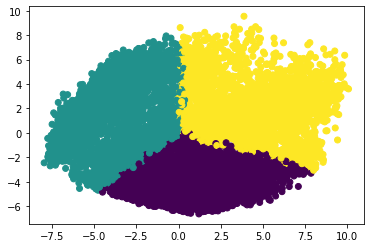

In [9]:
pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
pca_data = pd.DataFrame(pca_data)
pca_data.columns = ['comp1','comp2']
plt.scatter(pca_data["comp1"], pca_data["comp2"],c=labels)
plt.show()

In [26]:
tsne = TSNE(n_components=2,verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


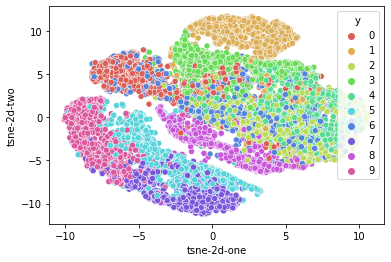

In [28]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = testy
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y", palette=sns.color_palette("hls", 10), data=df_subset, legend="full")

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(3).fit(X)

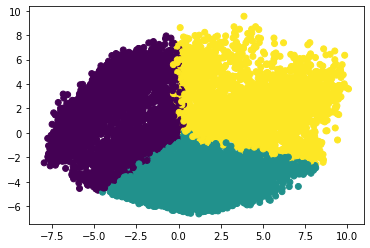

In [31]:
plt.scatter(pca_data["PCA1"], pca_data["PCA2"],c=kmeans.labels_)
plt.show()

In [33]:
print(model.centers)

[[0.00000000e+00 4.34027778e-05 9.25793196e-05 ... 1.86376634e-04
  2.68075980e-05 1.14620012e-05]
 [5.18492914e-04 5.91465991e-04 5.12150493e-04 ... 2.83957897e-02
  7.50018639e-03 1.33396299e-03]
 [0.00000000e+00 1.04639956e-04 2.54652524e-04 ... 8.86750735e-03
  3.75440387e-03 5.20097038e-04]]


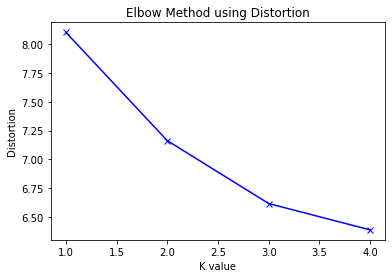

In [38]:
elbow(X, 5)

# Hierarchical clustering

In [39]:
# implement hierarchical clustering ( you can use scikit module)

def hierarchical_clustering(X,k,linkage='single'):
  model=AgglomerativeClustering(n_clusters=k)
  labels= model.fit_predict(X)
  return labels

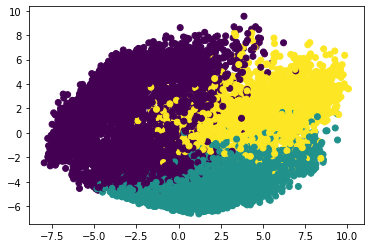

In [40]:
labels=hierarchical_clustering(X,3)
plt.scatter(pca_data["PCA1"],pca_data["PCA2"],c=labels)
plt.show()

In [41]:
# visualize a dendogram
def dendogram(X,method='ward'):
  dendogram=sch.dendrogram(sch.linkage(X,method=method))

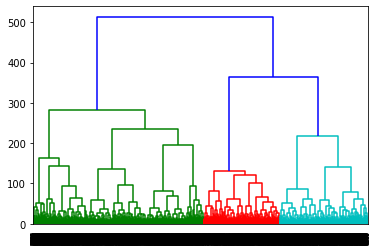

In [42]:
dendogram(X)

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: In the dendrogram we locate the largest vertical difference between the nodes, and pass an horizontal line in the middle. The number of vertical lines intersecting it is the optimal number of clusters.




In [43]:
#visualisation of clusters using single linkage and complete linkage

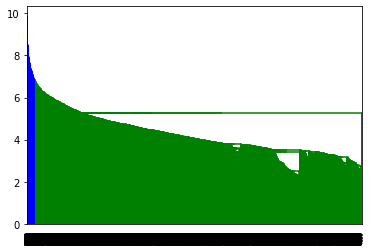

In [45]:
sys.setrecursionlimit(10**8)
dendogram(X,'single')

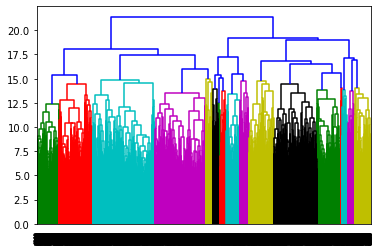

In [46]:
dendogram(X,'complete')

**Question:** Mention the differences observed using single and complete linkage:

Answer: 
Single-linkage (nearest neighbor) is the shortest distance between a pair of observations in two clusters.  It produced clusters where observations in different clusters were closer together than to observations within their own clusters. The clusters formed via single linkage clustering were forced together due to single elements being close to each other, even though many of the elements in each cluster were very distant to each other.


Complete-linkage (farthest neighbor) is where distance is measured between the farthest pair of observations in two clusters. This produced tighter clusters than single-linkage, but manages to find compact clusters of approximately equal size.